In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, distinct

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_rec_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# by using max func
most = session.query(func.max(Measurement.date)).all()
print(most_rec_date)

('2017-08-23',)


2016-08-23


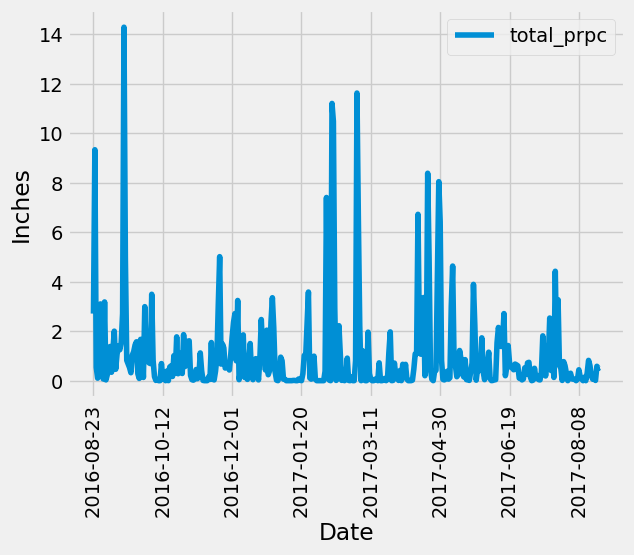

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_dt = most_rec_date[0]
last_date = dt.datetime.strptime(last_dt, '%Y-%m-%d')
start_date = last_date - dt.timedelta(days=365)
start_date_format = start_date.strftime('%Y-%m-%d')
print(start_date_format)

# Perform a query to retrieve the data and precipitation scores
data_list =[Measurement.date,func.sum(Measurement.prcp)]
prcp_data = session.query(*data_list).\
    filter(func.strftime(Measurement.date)>= start_date_format).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_data, columns=['measur_date', 'total_prpc'])

# Sort the dataframe by date
prcp_df.sort_values(by = 'measur_date')
prcp_df.set_index('measur_date', inplace=True)
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot(rot=90,xlabel ='Date',ylabel ='Inches')
plt.show()


In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,total_prpc
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number of stations in the dataset
total_station = session.query(func.count(distinct(Measurement.station))).all()
print(total_station)

[(9,)]


In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_list =[Measurement.station,func.count(Measurement.date)]
station_act = session.query(*station_list).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()
station_act

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_data_list = [func.min(Measurement.tobs),
             func.max(Measurement.tobs),
             func.avg(Measurement.tobs)]
             
tem_sum_station = session.query(*temp_data_list).\
    filter(Measurement.station == 'USC00519281').\
    group_by(Measurement.station)
for sta in tem_sum_station:
    print(sta)

(54.0, 85.0, 71.66378066378067)


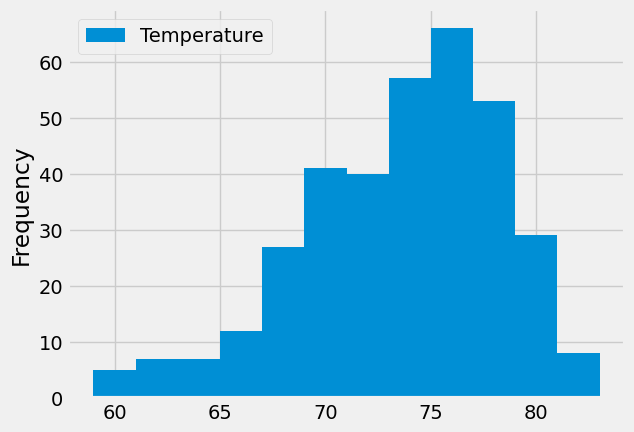

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tem_obs_list = [Measurement.date,
                Measurement.tobs]
tem_act_station = session.query(*tem_obs_list).\
    filter(func.strftime(Measurement.date) >= start_date_format, Measurement.station == 'USC00519281').\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
tem_act_station_df = pd.DataFrame(tem_act_station, columns= ['Date','Temperature'])
graph = tem_act_station_df.plot.hist(bins=12,label='tobs',xlabel='Temperature',ylabel ='Frequency')
plt.show()

# Close Session

In [35]:
# Close Session
session.close()